<a href="https://colab.research.google.com/github/srinivasreddyoleti/projects/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of Multiple Linear Regression

#Import relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

#Uploading data

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gpadataset.csv to gpadataset (3).csv


In [ ]:
df2=pd.read_csv('gpadataset.csv')
df2

,GPA,Entrance,Interview
0,9.50,9.80,9.1
1,6.30,7.50,7.1
2,8.20,7.90,7.7
3,9.10,9.50,9.6
4,8.20,9.10,7.5
5,8.32,8.50,8.4
6,9.60,7.54,9.5
7,7.60,8.40,7.8
8,6.50,5.60,7.8
9,8.64,8.00,8.5


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GPA         15 non-null     float64
 1   Entrance    15 non-null     float64
 2   Interview   15 non-null     float64
dtypes: float64(3)
memory usage: 488.0 bytes


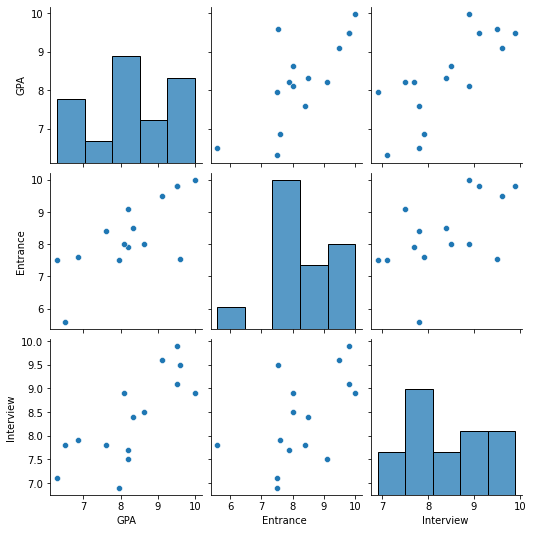

In [ ]:
sns.pairplot(df2)

In [ ]:
regmodel=linear_model.LinearRegression()

#Divide the response variable(GPA) and independent variable(Entrance,Interview).

In [ ]:
y=df2.iloc[0:,0].values

y

array([9.5 , 6.3 , 8.2 , 9.1 , 8.2 , 8.32, 9.6 , 7.6 , 6.5 , 8.64, 9.5 ,
       8.1 , 7.95, 9.99, 6.87])

In [ ]:
x=df2.iloc[0:,1:3].values
x

array([[ 9.8 ,  9.1 ],
       [ 7.5 ,  7.1 ],
       [ 7.9 ,  7.7 ],
       [ 9.5 ,  9.6 ],
       [ 9.1 ,  7.5 ],
       [ 8.5 ,  8.4 ],
       [ 7.54,  9.5 ],
       [ 8.4 ,  7.8 ],
       [ 5.6 ,  7.8 ],
       [ 8.  ,  8.5 ],
       [ 9.8 ,  9.9 ],
       [ 8.  ,  8.9 ],
       [ 7.5 ,  6.9 ],
       [10.  ,  8.9 ],
       [ 7.6 ,  7.9 ]])

In [ ]:
regmodel.fit(np.array(x).reshape(-1,2),np.array(y).reshape(-1,1))


LinearRegression()

In [ ]:
regmodel.coef_

array([[0.45544232, 0.62250322]])

In [ ]:
regmodel.intercept_

array([-0.70440195])

In [ ]:
df2['predicted values']=regmodel.predict(np.array(x).reshape(-1,2))
df2

,GPA,Entrance,Interview,predicted values
0,9.50,9.80,9.1,9.423712
1,6.30,7.50,7.1,7.131188
2,8.20,7.90,7.7,7.686867
3,9.10,9.50,9.6,9.598331
4,8.20,9.10,7.5,8.108897
5,8.32,8.50,8.4,8.395885
6,9.60,7.54,9.5,8.643414
7,7.60,8.40,7.8,7.976839
8,6.50,5.60,7.8,6.701600
9,8.64,8.00,8.5,8.230414


In [ ]:
y_pred=df2.iloc[0:,3].values
y_pred

array([9.4237121 , 7.13118832, 7.68686718, 9.59833101, 8.10889732,
       8.39588483, 8.64341374, 7.97683866, 6.70160016, 8.23041399,
       9.92171468, 8.47941528, 7.00668768, 9.39029992, 7.67473513])

#Mean Squared Error: measures how close a regression line is to a set of data points. 

In [ ]:
np.sqrt(mean_squared_error(np.array(y).reshape(-1,1),np.array(y_pred).reshape(-1,1)))

0.560162792390148

#R-square value

In [ ]:
R_squared=r2_score(np.array(y).reshape(-1,1),np.array(y_pred).reshape(-1,1))
R_squared

0.7405095141015077

#Adjusted R-square

In [ ]:
adjusted_R_square=1-(1-R_squared)*(df2.shape[0]-1)/(df2.shape[0]-2-1)
adjusted_R_square

0.6972610997850923